# Exploratory Data Analysis

- Important Sets
1. Understanding data
2. Clean data
3. Find a relationship between data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic.to_csv("titanic.csv")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [7]:
titanic.shape  # for rows and columns

(891, 15)

In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Uniques values
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [13]:
titanic["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [15]:
titanic[["who","sex"]].nunique()

who    3
sex    2
dtype: int64

# Cleaning and filtering data

In [16]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
# Removing missing values column
tit=titanic.drop(['deck'],axis=1)

In [32]:
tit

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
tit.isnull().sum()

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
tit=titanic.drop(['age'],axis=1)


In [28]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [34]:
tit.isnull().sum()

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
tit=tit.dropna()

In [39]:
tit.shape

(201, 14)

In [40]:
tit.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [43]:
tit.shape

(201, 14)

In [44]:
tit["sex"].value_counts()

male      106
female     95
Name: sex, dtype: int64

In [45]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
tit.describe()

,survived,pclass,sibsp,parch,fare
count,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.666667,1.199005,0.447761,0.442786,76.305307
std,0.472582,0.529338,0.631274,0.733458,74.891320
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,28.712500
50%,1.000000,1.000000,0.000000,0.000000,55.000000
75%,1.000000,1.000000,1.000000,1.000000,90.000000
max,1.000000,3.000000,3.000000,4.000000,512.329200


In [47]:
tit.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

<AxesSubplot:ylabel='survived'>

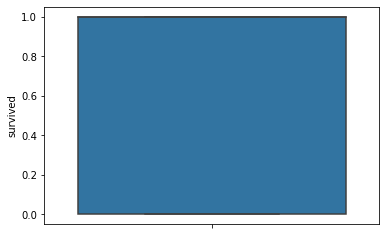

In [51]:
sns.boxplot(y="survived",data=tit)

c:\Users\Zoraiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='survived', ylabel='Density'>

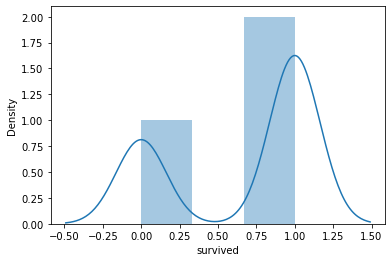

In [52]:
sns.distplot(tit["survived"])

<AxesSubplot:>

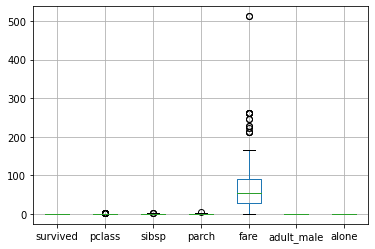

In [53]:
tit.boxplot()

<AxesSubplot:>

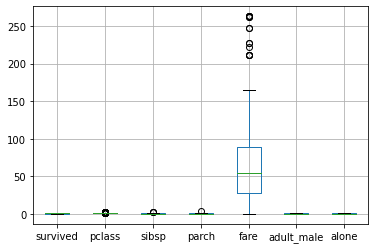

In [54]:
tit = tit[tit['fare']<300]
tit.boxplot()

c:\Users\Zoraiz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Zoraiz\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Zoraiz\AppData\Local\Temp\ipykernel_6276\2204109407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit['fare_log']=np.log(tit['fare'])


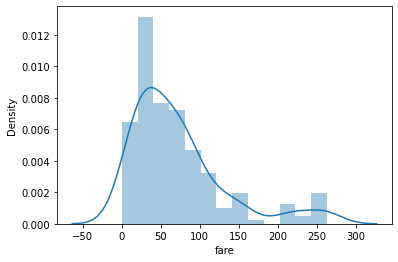

In [70]:
sns.distplot(tit['fare'])
# Log Transformation
tit['fare_log']=np.log(tit['fare'])

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>, <AxesSubplot:>]],
      dtype=object)

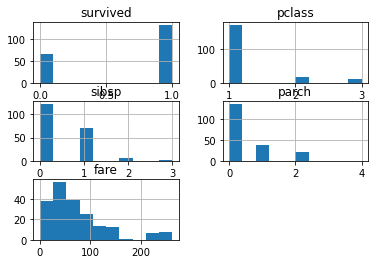

In [56]:
tit.hist()

<AxesSubplot:>

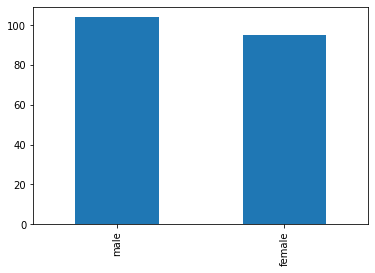

In [58]:
pd.value_counts(tit['sex']).plot.bar()

<AxesSubplot:>

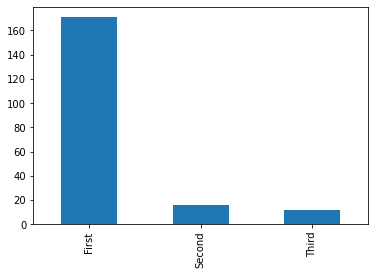

In [59]:
pd.value_counts(tit['class']).plot.bar()

sex     class 
female  First     AxesSubplot(0.125,0.125;0.775x0.755)
        Second    AxesSubplot(0.125,0.125;0.775x0.755)
        Third     AxesSubplot(0.125,0.125;0.775x0.755)
male    First     AxesSubplot(0.125,0.125;0.775x0.755)
        Second    AxesSubplot(0.125,0.125;0.775x0.755)
        Third     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

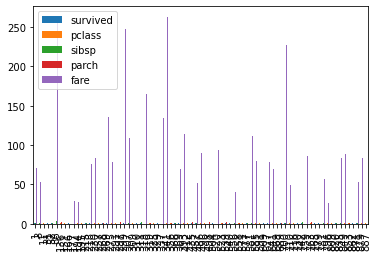

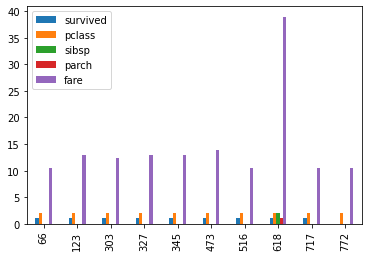

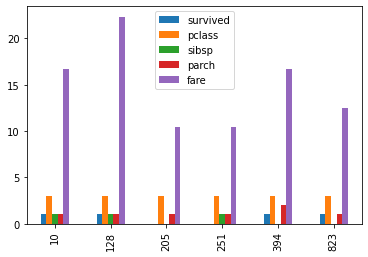

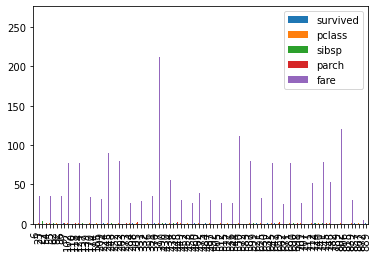

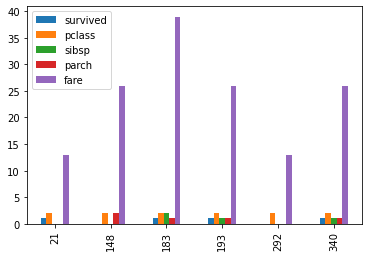

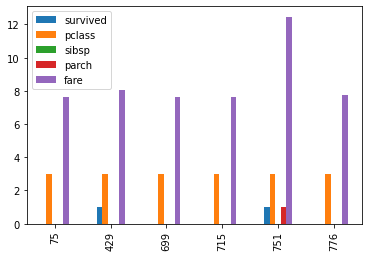

In [60]:
tit.groupby(['sex','class']).plot.bar()

In [61]:
tit.groupby(['sex','class']).mean()

survived  pclass     sibsp     parch        fare  adult_male  \
sex    class                                                                  
female First   0.962025     1.0  0.594937  0.531646  101.594620    0.000000   
       Second  0.900000     2.0  0.200000  0.100000   14.614170    0.000000   
       Third   0.666667     3.0  0.500000  1.166667   14.859717    0.000000   
male   First   0.402174     1.0  0.369565  0.347826   63.666667    0.967391   
       Second  0.666667     2.0  0.666667  0.833333   23.812500    0.500000   
       Third   0.333333     3.0  0.000000  0.166667    8.537500    0.833333   

                  alone  
sex    class             
female First   0.303797  
       Second  0.900000  
       Third   0.000000  
male   First   0.543478  
       Second  0.333333  
       Third   0.833333

In [62]:
# Relationship
tit.corr()

,survived,pclass,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.030733,0.139840,0.038097,0.103458,-0.602933,-0.164475
pclass,-0.030733,1.000000,-0.091429,0.055697,-0.359088,-0.123182,0.055396
sibsp,0.139840,-0.091429,1.000000,0.262628,0.410625,-0.189034,-0.651024
parch,0.038097,0.055697,0.262628,1.000000,0.468931,-0.204127,-0.547771
fare,0.103458,-0.359088,0.410625,0.468931,1.000000,-0.228198,-0.384968
adult_male,-0.602933,-0.123182,-0.189034,-0.204127,-0.228198,1.000000,0.265228
alone,-0.164475,0.055396,-0.651024,-0.547771,-0.384968,0.265228,1.000000


In [63]:
tit1 = tit.corr()

<AxesSubplot:>

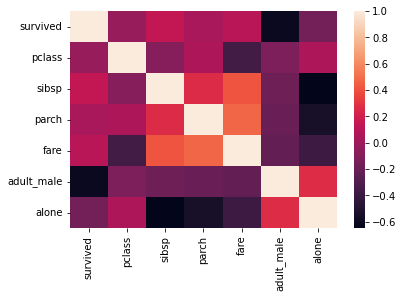

In [64]:
sns.heatmap(tit1)

<AxesSubplot:>

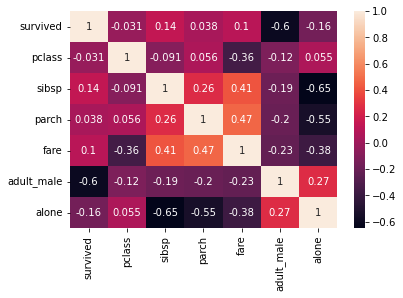

In [65]:
sns.heatmap(tit1,annot=True)

<AxesSubplot:xlabel='survived', ylabel='fare'>

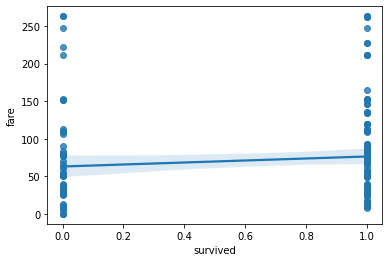

In [68]:
sns.regplot(x='survived',y='fare',data=tit)

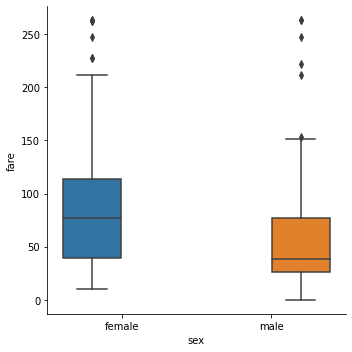

In [69]:
sns.catplot(x='sex',y='fare',hue='sex',kind='box',data=tit)

In [71]:
tit.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_log
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4.266662
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.972177
6,0,1,male,0,0,51.8625,S,First,man,True,E,Southampton,no,True,3.948596
10,1,3,female,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,2.815409
11,1,1,female,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,3.279030


<AxesSubplot:xlabel='sex', ylabel='fare_log'>

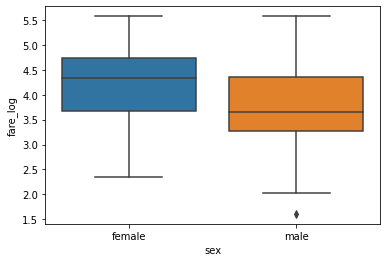

In [75]:
sns.boxplot(x="sex",y="fare_log",data=tit)